# Project - Statistical Methods For Decision Making

### Marks: 60 points

# Problem Statement 1 - Wholesale Customers Analysis

### Business Context

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of productsin 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

### Objective

They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description


1. Buyer/Spender- ID's of customers
2. Region- Region of the distributor
3. Fresh- spending on Fresh Vegetables
4. Milk- spending on milk
5. Grocery- spending on grocery
6. Frozen- spending on frozen food
7. Detergents_paper- spending on detergents and toilet paper
8. Delicatessen- spending on instant foods

## Let us start by importing the required libraries

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats as st
from scipy.stats import iqr #To calculate the IQR - Interquartile Range
import statistics as stat # To calculate the MODE
from statistics import stdev # To calculate the standard deviation
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [13]:
# Read the data
df = pd.read_csv(r'C:\Users\yaama\Desktop\New folder\Wholesale Customer.csv') ## Fill the blank to read the data

In [14]:
# Returns the first 5 rows
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [15]:
## Data Overview

#### How many rows and columns are present in the data?

In [17]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(440, 9)

####  What are the datatypes of the different columns in the dataset?

In [19]:
# Check the datatypes
df.info() #Write an appropriate function to check teh data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


#### Are there any missing values in the data?

In [21]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

#### Check the statistical summary of the data.

In [23]:
# Get the summary statistics of the numerical data
df.describe() ## Write the appropriate function to print the statistical summary of the data (Hint - you have seen this in the case studies before)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Explore all the categorical variables and provide observations on their frequency.

###### plt.figure(figsize=(8, 8))
#sns.countplot(df['Region'])
sns.countplot(data=df, x='Region')  ## Complete the code to plot the graph
plt.xlabel('Regions')
plt.ylabel('Number of Wholesale Distributors')
plt.show()

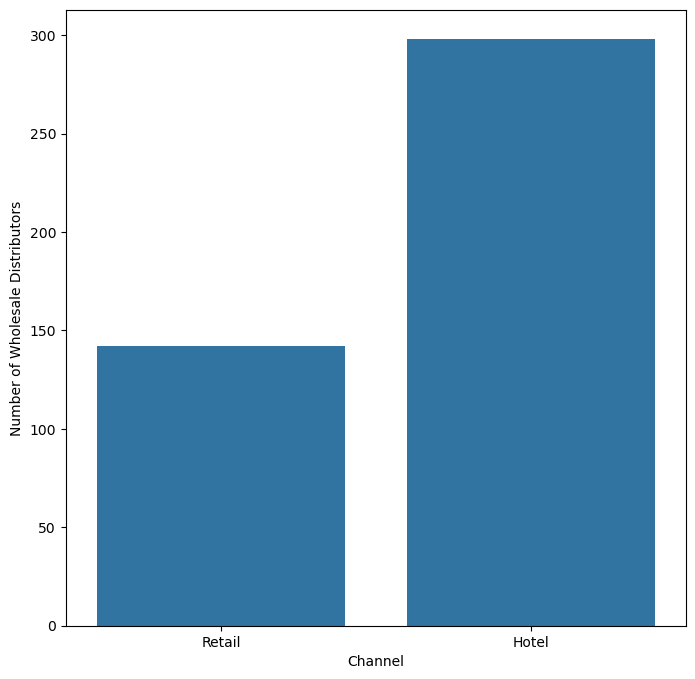

In [28]:
plt.figure(figsize=(8, 8))

sns.countplot(data=df, x='Channel')  ## Complete the code to plot the graph
plt.xlabel('Channel')
plt.ylabel('Number of Wholesale Distributors')
plt.show()

#### Find the distribution of spending across all categories

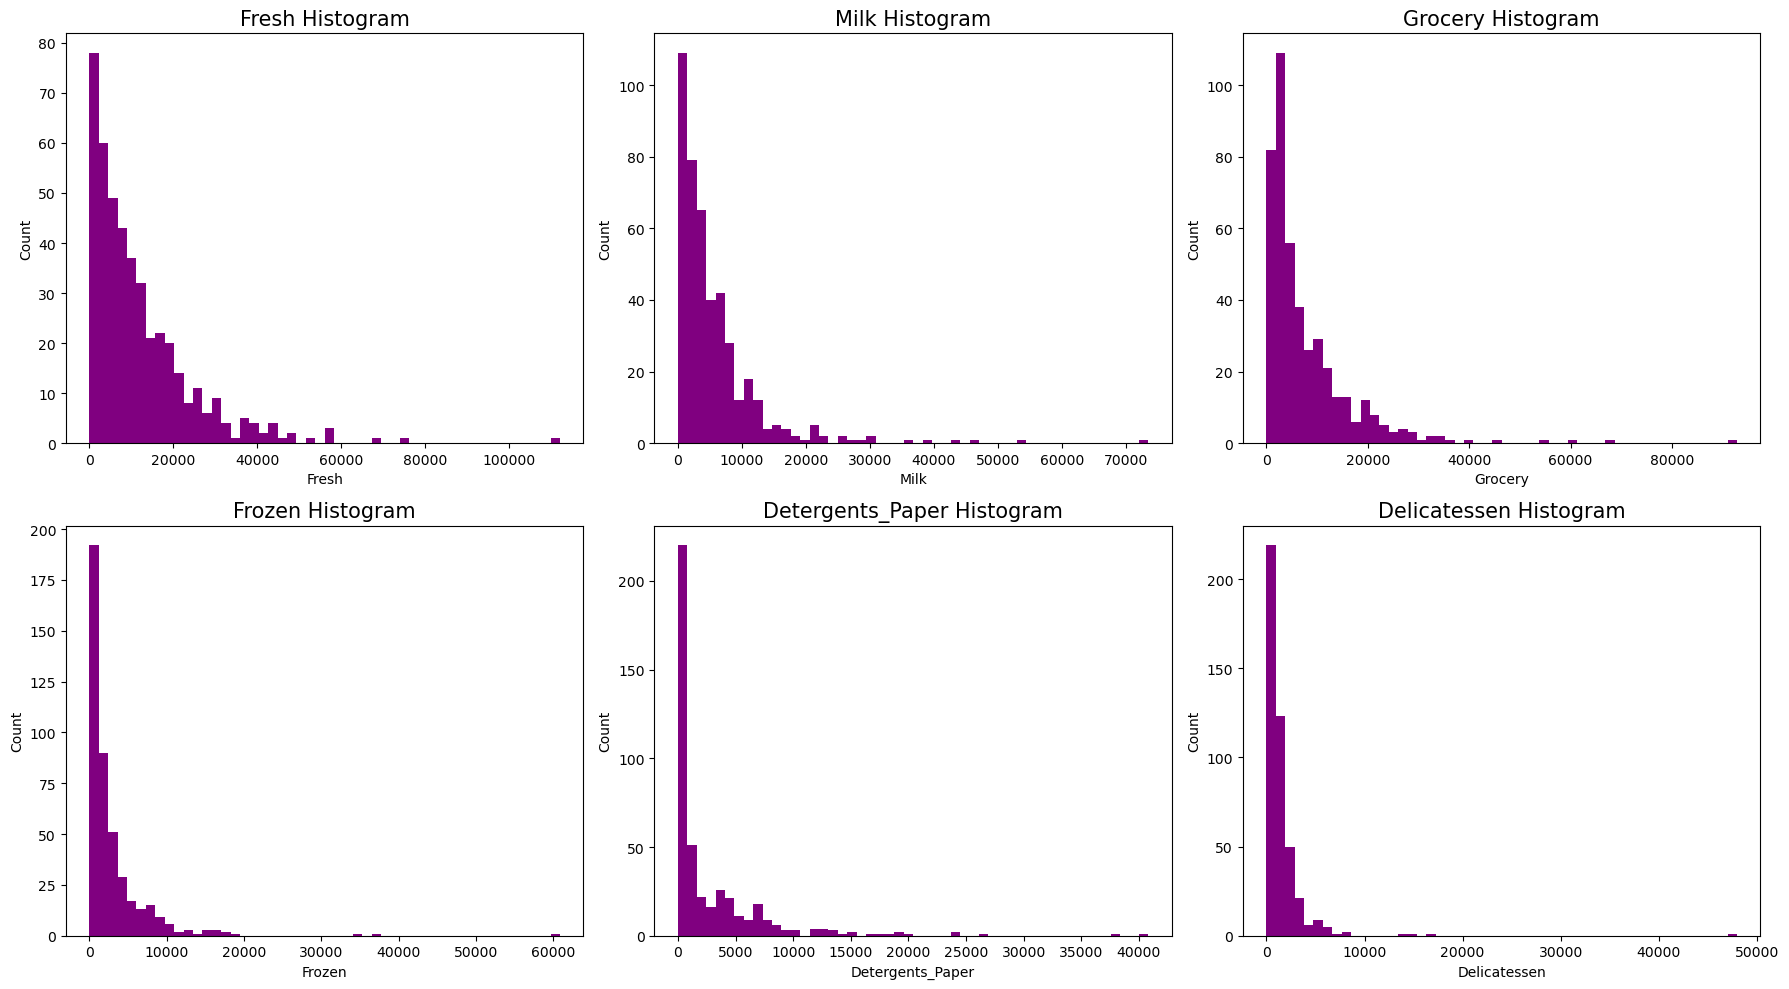

In [30]:
import matplotlib.pyplot as plt

cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(len(cols)):
    ax = axes[i // 3, i % 3]
    col = cols[i]
    ax.hist(df[col], bins=50, color='Purple') ## Complete the code to plot a histogram
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.set_title(col + " Histogram", fontsize=15)

plt.tight_layout()
plt.show()

#### Are there any outliers in the data?

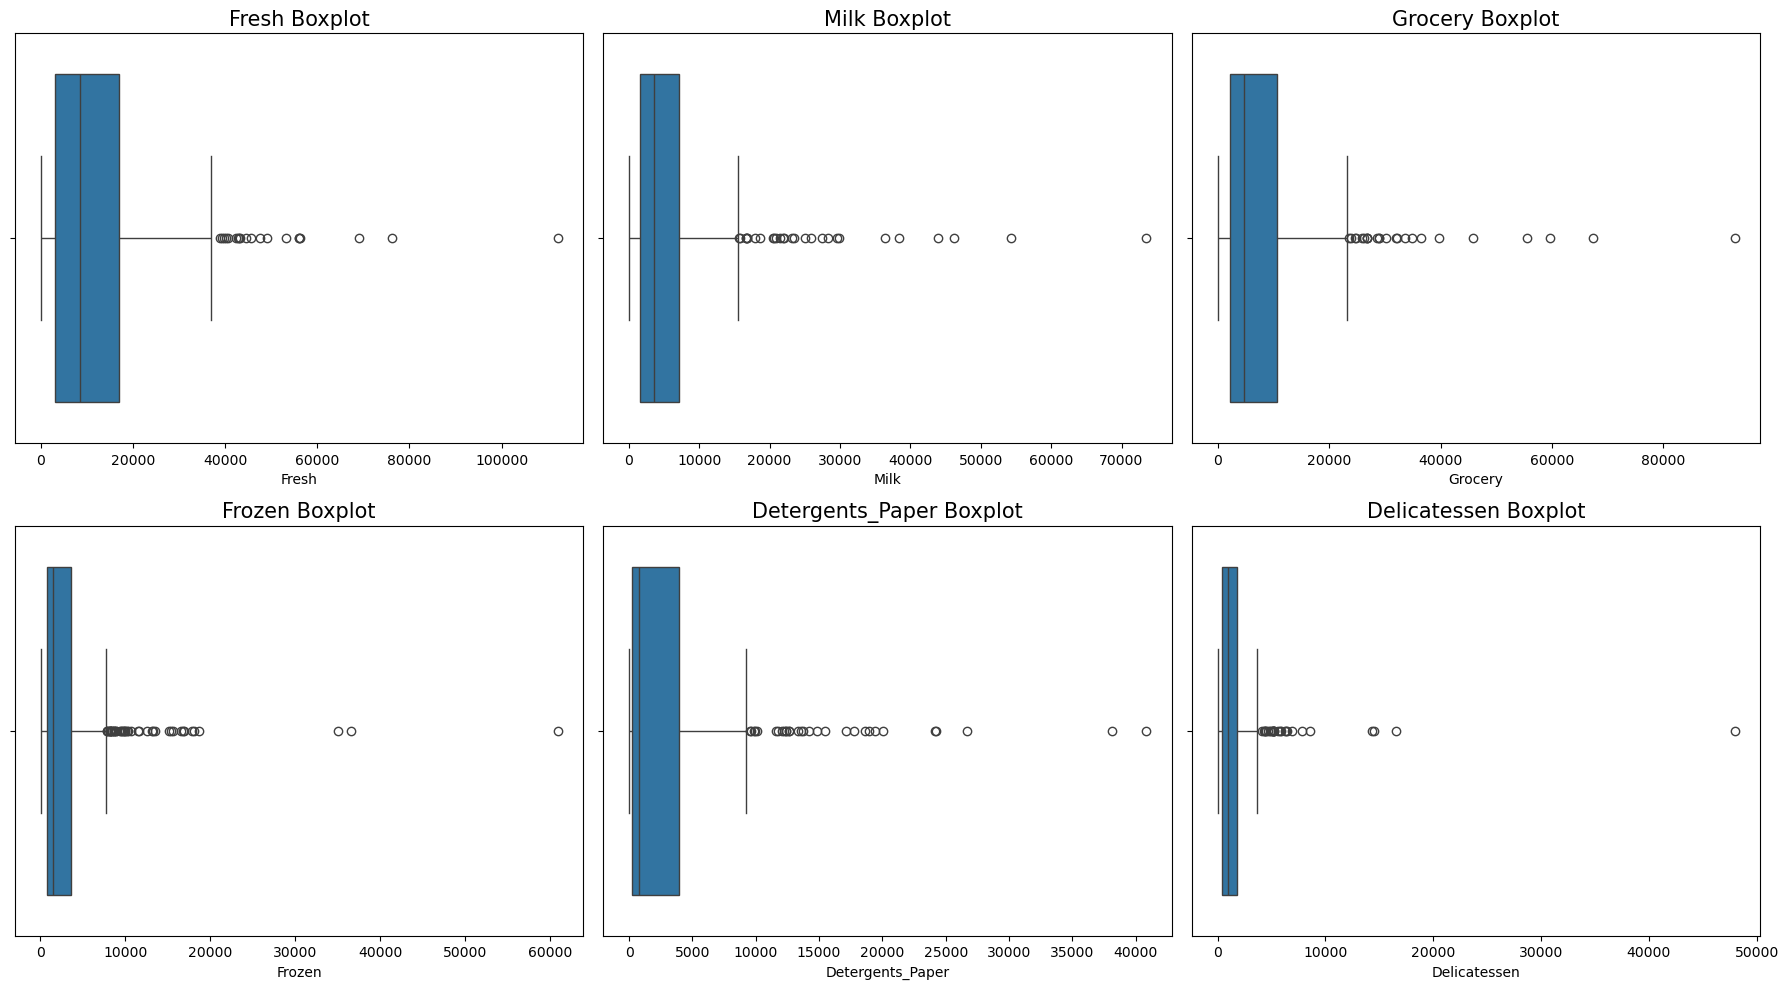

In [32]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(len(cols)):
    ax = axes[i // 3, i % 3]
    col = cols[i]
    sns.boxplot(data=df[cols], x=col, orient="v", ax=ax) ## Complete the code to create boxplot
    ax.set_title(col + " Boxplot", fontsize=15)

plt.tight_layout()
plt.show()

### Multivariate Analysis

**We will create a new column of total of spendings by adding the 6 different varieties.**

In [48]:
## Adding row totals to the data frame
df['Total'] = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].sum(axis=1)## Complete the code to add the column
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [50]:
####  Find the total spending across all regions

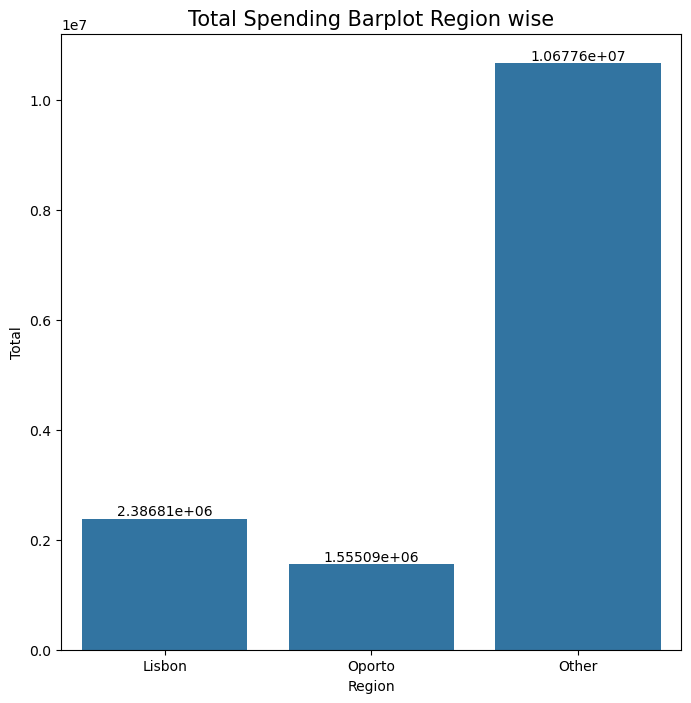

In [52]:
plt.figure(figsize=(8, 8))
RegionAggregated = df.groupby("Region")['Total'].sum().round(decimals=0).reset_index() ## Complete the create a temporary dataframe
ax=sns.barplot(x="Region", y="Total", data=RegionAggregated) ## Complete the code to find plot a bar graph
ax.bar_label(ax.containers[0])
plt.title("Total Spending Barplot Region wise", fontsize=15)
plt.show()

In [54]:
#### Find the total spending of all the channels

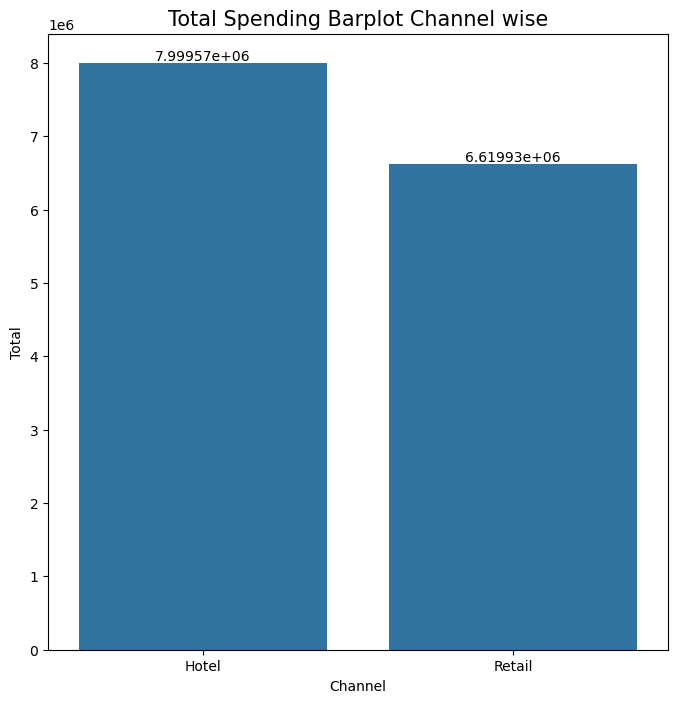

In [56]:
plt.figure(figsize=(8, 8))
channelsAggregated = df.groupby("Channel")['Total'].sum().round(decimals=0).reset_index() ## Complete the create a temporary dataframe
ax=sns.barplot(x="Channel", y="Total", data=channelsAggregated) ## Complete the code to find plot a bar graph
ax.bar_label(ax.containers[0])
plt.title("Total Spending Barplot Channel wise", fontsize=15)
plt.show()

In [58]:
#### Find the total spending across regions via different channels

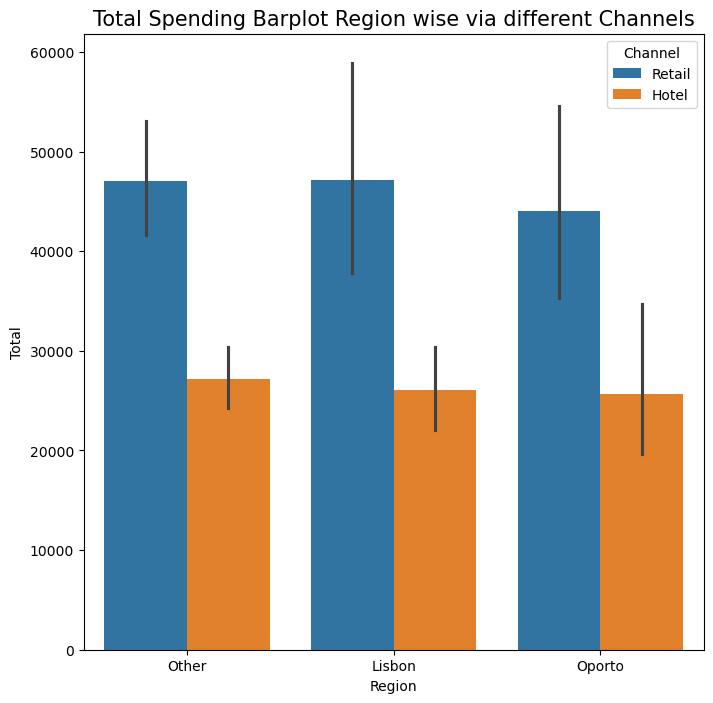

In [60]:
plt.figure(figsize=(8, 8))
sns.barplot(x='Region', y='Total', hue='Channel',data=df)
plt.title("Total Spending Barplot Region wise via different Channels", fontsize=15)
plt.show()

In [62]:
#Now drop the Total column
df.drop('Total',axis=1, inplace=True) ## Complete the code to drop the column

In [64]:
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [66]:
#### Find the total spending on each of the categories across different region and channels

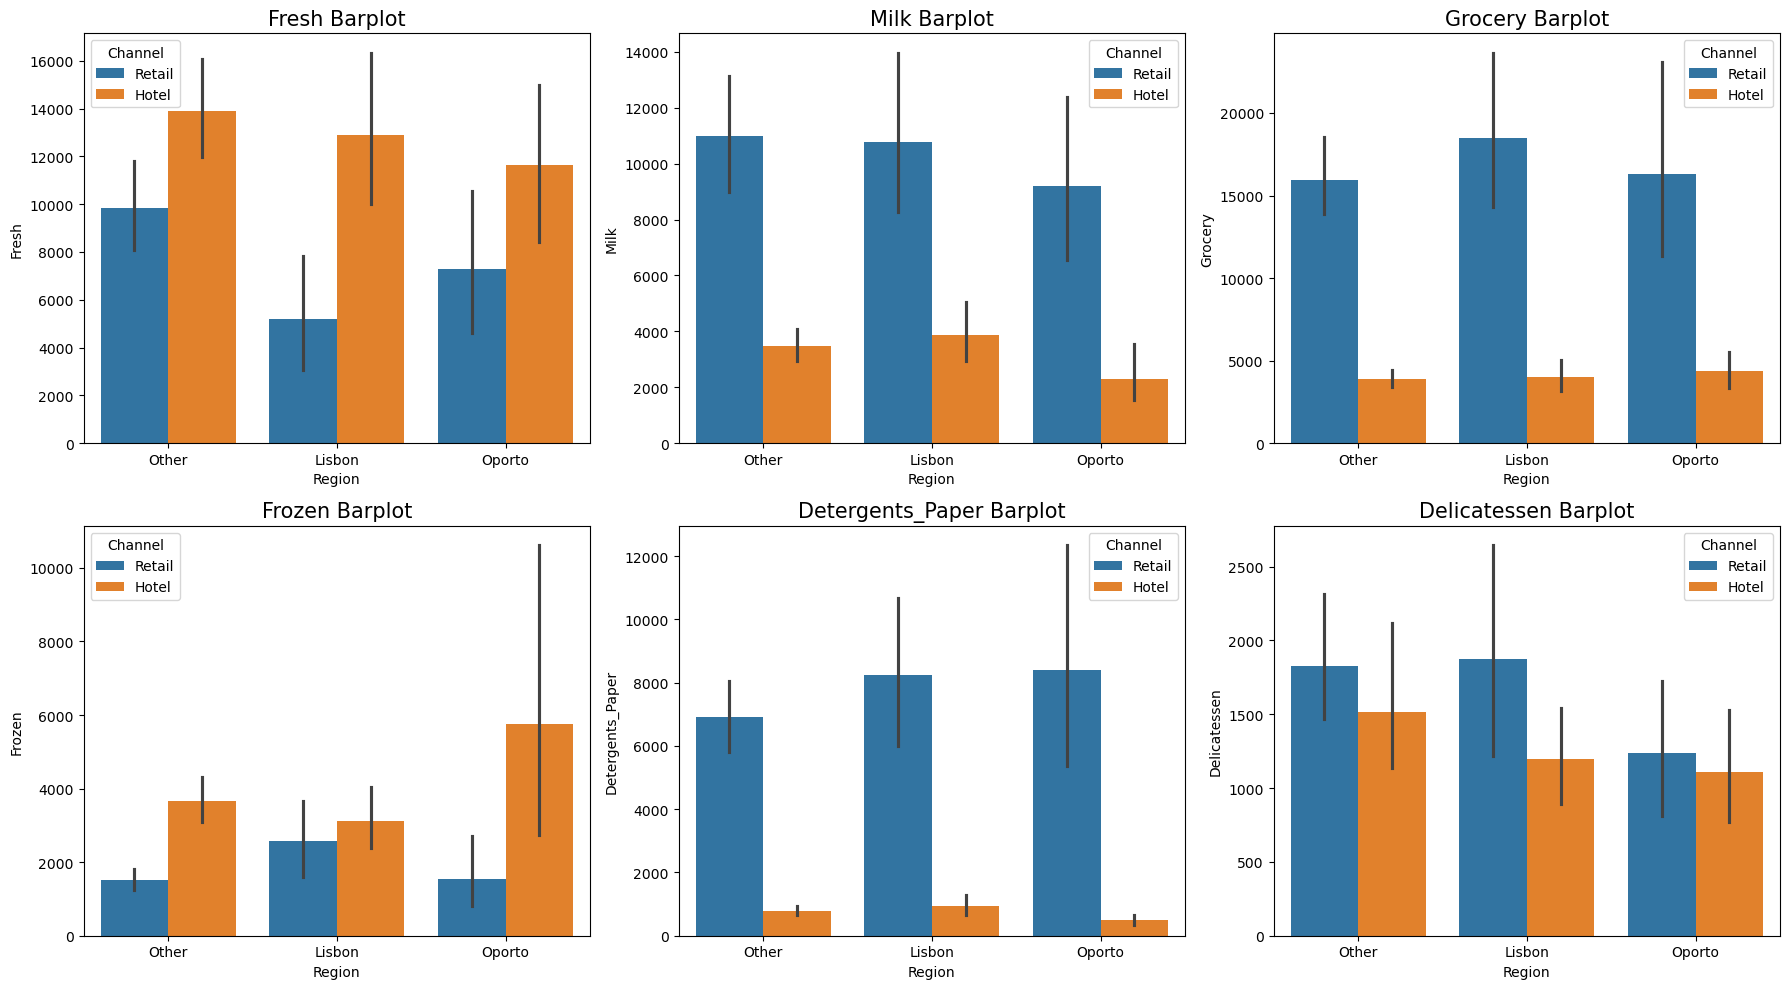

In [68]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i in range(len(cols)):
    ax = axes[i // 3, i % 3]
    col = cols[i]
    sns.barplot(data=df, x='Region',y=col, hue='Channel', orient="v", ax=ax)
    ax.set_title(col + " Barplot", fontsize=15)

plt.tight_layout()
plt.show()

#### Do the item varieties show similar behavior across region and channel?

Hint: There are 6 different varieties of items in the data.

**We will subset the dataset with respect to region and channel.**

In [72]:
# Channel wise data subset
Retail = df[df['Channel'] == "Retail"]  ## Complete the create a temporary dataframe
Hotel = df[df['Channel'] == "Hotel"]  ## Complete the create a temporary dataframe

In [74]:
Retail

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
...,...,...,...,...,...,...,...,...,...
418,419,Retail,Other,660,8494,18622,133,6740,776
421,422,Retail,Other,17063,4847,9053,1031,3415,1784
423,424,Retail,Other,17565,3686,4657,1059,1803,668
424,425,Retail,Other,16980,2884,12232,874,3213,249


**To check the behaivour of the item varieties, we will check the statistical summary.**

In [79]:
Hotel

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
8,9,Hotel,Other,5963,3648,6192,425,1716,750
15,16,Hotel,Other,10253,1114,3821,397,964,412
17,18,Hotel,Other,5876,6157,2933,839,370,4478
19,20,Hotel,Other,7780,2495,9464,669,2518,501
...,...,...,...,...,...,...,...,...,...
434,435,Hotel,Other,16731,3922,7994,688,2371,838
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [81]:
Retail.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,142.0,183.000000,132.136132,1.0,61.25,166.5,303.75,438.0
Fresh,142.0,8904.323944,8987.714750,18.0,2347.75,5993.5,12229.75,44466.0
Milk,142.0,10716.500000,9679.631351,928.0,5938.00,7812.0,12162.75,73498.0
Grocery,142.0,16322.852113,12267.318094,2743.0,9245.25,12390.0,20183.50,92780.0
Frozen,142.0,1652.612676,1812.803662,33.0,534.25,1081.0,2146.75,11559.0
Detergents_Paper,142.0,7269.507042,6291.089697,332.0,3683.50,5614.5,8662.50,40827.0
Delicatessen,142.0,1753.436620,1953.797047,3.0,566.75,1350.0,2156.00,16523.0


In [83]:
Hotel.describe().T ## Complete the code to perform decriptive analysis

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,298.0,238.369128,120.910343,4.0,137.25,241.5,344.50,440.0
Fresh,298.0,13475.560403,13831.687502,3.0,4070.25,9581.5,18274.75,112151.0
Milk,298.0,3451.724832,4352.165571,55.0,1164.50,2157.0,4029.50,43950.0
Grocery,298.0,3962.137584,3545.513391,3.0,1703.75,2684.0,5076.75,21042.0
Frozen,298.0,3748.251678,5643.912500,25.0,830.00,2057.5,4558.75,60869.0
Detergents_Paper,298.0,790.560403,1104.093673,3.0,183.25,385.5,899.50,6907.0
Delicatessen,298.0,1415.956376,3147.426922,3.0,379.00,821.0,1548.00,47943.0


In [85]:
# Region wise data subset
Lisbon = df[df['Region'] == "Lisbon"]  ## Complete the code to create a temporary dataframe
Oporto = df[df['Region'] == "Oporto"]  ## Complete the code to create a temporary dataframe
Other = df[df['Region'] == "Other"]  ## Complete the code to create a temporary dataframe

**To check the behaivour of the varities, we will do the descriptive analytics**

In [88]:
Lisbon.describe().T  ## Complete the code to perform decriptive analysis

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,77.0,235.000000,22.371857,197.0,216.0,235.0,254.0,273.0
Fresh,77.0,11101.727273,11557.438575,18.0,2806.0,7363.0,15218.0,56083.0
Milk,77.0,5486.415584,5704.856079,258.0,1372.0,3748.0,7503.0,28326.0
Grocery,77.0,7403.077922,8496.287728,489.0,2046.0,3838.0,9490.0,39694.0
Frozen,77.0,3000.337662,3092.143894,61.0,950.0,1801.0,4324.0,18711.0
Detergents_Paper,77.0,2651.116883,4208.462708,5.0,284.0,737.0,3593.0,19410.0
Delicatessen,77.0,1354.896104,1345.423340,7.0,548.0,806.0,1775.0,6854.0


In [90]:
Oporto.describe().T  ## Complete the code to perform decriptive analysis

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,47.0,317.000000,13.711309,294.0,305.5,317.0,328.5,340.0
Fresh,47.0,9887.680851,8387.899211,3.0,2751.5,8090.0,14925.5,32717.0
Milk,47.0,5088.170213,5826.343145,333.0,1430.5,2374.0,5772.5,25071.0
Grocery,47.0,9218.595745,10842.745314,1330.0,2792.5,6114.0,11758.5,67298.0
Frozen,47.0,4045.361702,9151.784954,131.0,811.5,1455.0,3272.0,60869.0
Detergents_Paper,47.0,3687.468085,6514.717668,15.0,282.5,811.0,4324.5,38102.0
Delicatessen,47.0,1159.702128,1050.739841,51.0,540.5,898.0,1538.5,5609.0


In [92]:
Other.describe().T  ## Complete the code to perform decriptive analysis

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,316.0,202.613924,143.615303,1.0,79.75,158.5,361.25,440.0
Fresh,316.0,12533.471519,13389.213115,3.0,3350.75,8752.5,17406.50,112151.0
Milk,316.0,5977.085443,7935.463443,55.0,1634.00,3684.5,7198.75,73498.0
Grocery,316.0,7896.363924,9537.287778,3.0,2141.50,4732.0,10559.75,92780.0
Frozen,316.0,2944.594937,4260.126243,25.0,664.75,1498.0,3354.75,36534.0
Detergents_Paper,316.0,2817.753165,4593.051613,3.0,251.25,856.0,3875.75,40827.0
Delicatessen,316.0,1620.601266,3232.581660,3.0,402.00,994.0,1832.75,47943.0


#### Is there any correlation between the different item varieties in terms of spending?

In [95]:
sns.color_palette("tab10")
plt.figure(figsize=(15,7))
d = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot = True,mask=mask)

<Axes: >